## Step 1. Data Collection

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.linear_model as lr
import sklearn.model_selection as train_test_split
from matplotlib import pyplot as plt
import matplotlib

In [9]:
df = pd.read_csv('dataset_risk_analytics.csv')

## Step2. Data Exploration

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_id                    5783 non-null   int64  
 1   monthly_income             5406 non-null   float64
 2   origination_score_band     5783 non-null   int64  
 3   TOB_months                 5406 non-null   float64
 4   closing_principal_balance  5406 non-null   float64
 5   original_loan_amount       5406 non-null   float64
 6   product                    5783 non-null   object 
 7   original_loan_term         5783 non-null   int64  
 8   remaining_loan_term        5783 non-null   int64  
 9   delq_history               5406 non-null   object 
 10  target                     5783 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 497.1+ KB


In [11]:
df.describe()

,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,original_loan_term,remaining_loan_term,target
count,5783.000000,5406.000000,5783.000000,5406.000000,5406.000000,5406.000000,5783.000000,5783.000000,5783.000000
mean,3625.042711,14314.372919,3.904029,28.385683,5714.391417,6630.701073,62.023517,39.618364,0.302092
std,1516.292643,13799.514988,1.490877,16.357494,7837.483534,8491.265603,23.774170,25.004423,0.459205
min,1000.000000,750.000000,1.000000,6.000000,100.000000,100.000000,12.000000,0.000000,0.000000
25%,2310.500000,6000.000000,3.000000,17.000000,1380.000000,1800.000000,60.000000,23.000000,0.000000
50%,3623.000000,9750.000000,4.000000,24.000000,3000.000000,3750.000000,60.000000,40.000000,0.000000
75%,4934.500000,17250.000000,5.000000,38.000000,6800.000000,8100.000000,60.000000,51.000000,1.000000
max,6249.000000,99750.000000,8.000000,83.000000,88200.000000,90000.000000,192.000000,177.000000,1.000000


In [12]:
df

,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,delq_history,target
0,1000,6000.0,5,83.0,300.0,1800.0,B,24,5,"0,0,0,0,0,0",0
1,1001,39000.0,5,82.0,7200.0,11700.0,B,60,42,"0,1,0,0,0,0",0
2,1002,18000.0,5,78.0,2700.0,5400.0,B,60,46,"0,0,1,0,0,0",0
3,1003,23250.0,3,76.0,3900.0,6900.0,B,60,48,"1,1,0,1,0,0",1
4,1004,12000.0,3,74.0,2100.0,3600.0,B,60,50,"1,0,0,0,0,0",0
...,...,...,...,...,...,...,...,...,...,...,...
5778,6245,8250.0,4,6.0,6000.0,6000.0,A,36,35,"0,0,0,0,0,0",0
5779,6246,2250.0,5,6.0,1500.0,1500.0,C,12,11,"0,0,0,0,0,0",0
5780,6247,3750.0,5,6.0,3000.0,3000.0,D,60,65,"0,0,0,0,0,0",0
5781,6248,9750.0,7,6.0,7500.0,7500.0,D,60,65,"0,0,0,0,0,0",1


## Step 3. Data Wrangling

In [13]:
df.duplicated(subset=['loan_id']).sum()    #find duplicates in dataset

533

In [14]:
df = df.drop_duplicates(subset=['loan_id'])   #Drop duplicates

In [15]:
df.duplicated(subset=['loan_id']).sum()    #verify that duplicates have been dropped

0

In [16]:
df.isnull().sum()

loan_id                        0
monthly_income               377
origination_score_band         0
TOB_months                   377
closing_principal_balance    377
original_loan_amount         377
product                        0
original_loan_term             0
remaining_loan_term            0
delq_history                 377
target                         0
dtype: int64

In [17]:
data = df.fillna({
    'monthly_income' : df['monthly_income'].mean(),
    'TOB_months' : df['TOB_months'].mean(),
    'closing_principal_balance' : df['closing_principal_balance'].mean(),
    'original_loan_amount' : df['original_loan_amount'].mean(),
    'delq_history' : df['delq_history'].mode()[0],
})

data.isnull().sum()        #Replacing null values with the mean(for int/float datatype) and mode (for object datatype)

loan_id                      0
monthly_income               0
origination_score_band       0
TOB_months                   0
closing_principal_balance    0
original_loan_amount         0
product                      0
original_loan_term           0
remaining_loan_term          0
delq_history                 0
target                       0
dtype: int64

In [18]:
data.shape

(5250, 11)

In [19]:
data

,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,delq_history,target
0,1000,6000.0,5,83.0,300.0,1800.0,B,24,5,"0,0,0,0,0,0",0
1,1001,39000.0,5,82.0,7200.0,11700.0,B,60,42,"0,1,0,0,0,0",0
2,1002,18000.0,5,78.0,2700.0,5400.0,B,60,46,"0,0,1,0,0,0",0
3,1003,23250.0,3,76.0,3900.0,6900.0,B,60,48,"1,1,0,1,0,0",1
4,1004,12000.0,3,74.0,2100.0,3600.0,B,60,50,"1,0,0,0,0,0",0
...,...,...,...,...,...,...,...,...,...,...,...
5778,6245,8250.0,4,6.0,6000.0,6000.0,A,36,35,"0,0,0,0,0,0",0
5779,6246,2250.0,5,6.0,1500.0,1500.0,C,12,11,"0,0,0,0,0,0",0
5780,6247,3750.0,5,6.0,3000.0,3000.0,D,60,65,"0,0,0,0,0,0",0
5781,6248,9750.0,7,6.0,7500.0,7500.0,D,60,65,"0,0,0,0,0,0",1


#Step 4. Modelling

C:\Users\Manyi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


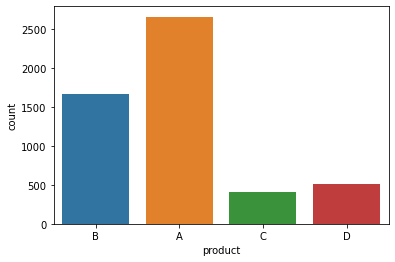

In [20]:
#Exploratory Data Analysis
sns.countplot(data['product'])
plt.savefig('product.jpg')

In [21]:
data['product'].describe()

count     5250
unique       4
top          A
freq      2660
Name: product, dtype: object

C:\Users\Manyi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='original_loan_term', ylabel='count'>

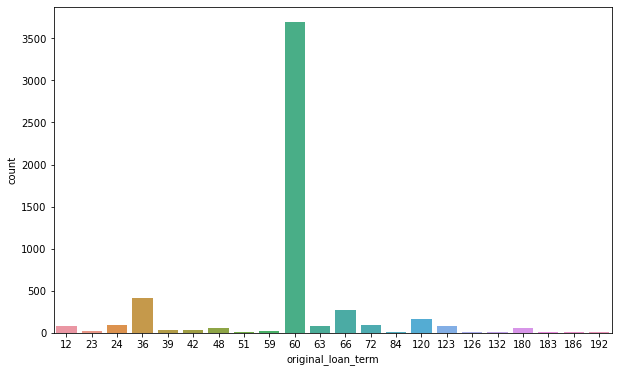

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(data['original_loan_term'])

C:\Users\Manyi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='origination_score_band', ylabel='count'>

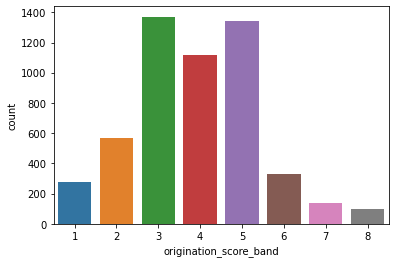

In [23]:
sns.countplot(data['origination_score_band'])

C:\Users\Manyi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


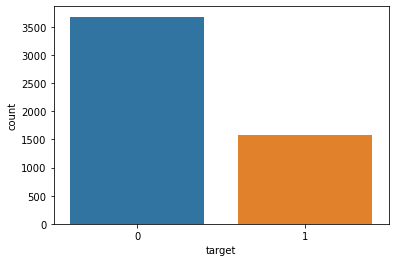

In [24]:
sns.countplot(data['target'])
plt.savefig('target.jpg')

C:\Users\Manyi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='monthly_income', ylabel='Density'>

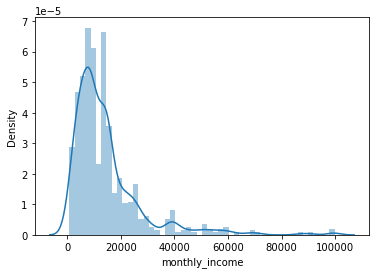

In [25]:
sns.distplot(data['monthly_income'])

In [26]:
data['monthly_income'].describe()

count     5250.000000
mean     14414.836856
std      13436.663249
min        750.000000
25%       6000.000000
50%       9750.000000
75%      15750.000000
max      99750.000000
Name: monthly_income, dtype: float64

In [27]:
#applying log transformation to normalize the attributes
data['monthly_income_log'] = np.log(df['monthly_income'])

C:\Users\Manyi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='monthly_income_log', ylabel='Density'>

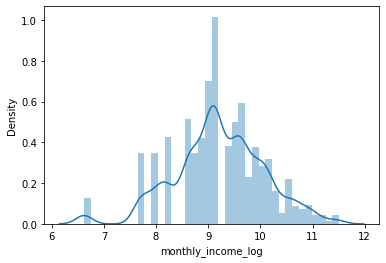

In [28]:
sns.distplot(data['monthly_income_log'])

C:\Users\Manyi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TOB_months', ylabel='Density'>

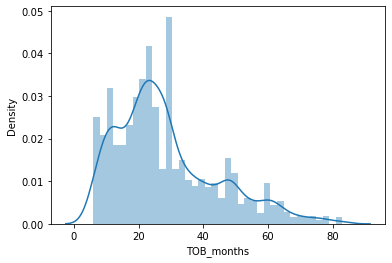

In [29]:
sns.distplot(data['TOB_months'])

C:\Users\Manyi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='closing_principal_balance', ylabel='Density'>

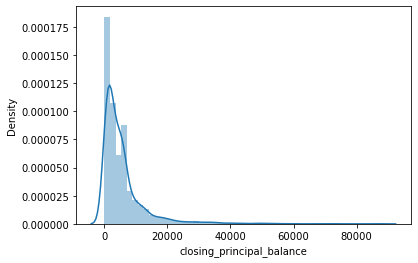

In [30]:
sns.distplot(data['closing_principal_balance'])

In [31]:
data['closing_principal_balance'].describe()

count     5250.000000
mean      5764.565976
std       7667.836564
min        100.000000
25%       1500.000000
50%       3600.000000
75%       6447.500000
max      88200.000000
Name: closing_principal_balance, dtype: float64

C:\Users\Manyi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='closing_principal_balance_log', ylabel='Density'>

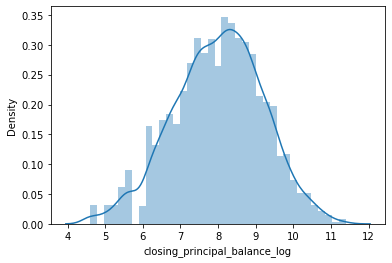

In [32]:
data['closing_principal_balance_log'] = np.log(df['closing_principal_balance'])
sns.distplot(data['closing_principal_balance_log'])

C:\Users\Manyi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='original_loan_amount', ylabel='Density'>

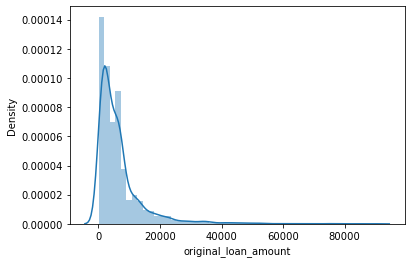

In [33]:
sns.distplot(data['original_loan_amount'])

In [34]:
data['original_loan_amount'].describe()

count     5250.000000
mean      6685.485327
std       8297.713989
min        100.000000
25%       1840.000000
50%       4275.000000
75%       7500.000000
max      90000.000000
Name: original_loan_amount, dtype: float64

C:\Users\Manyi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='original_loan_amount_log', ylabel='Density'>

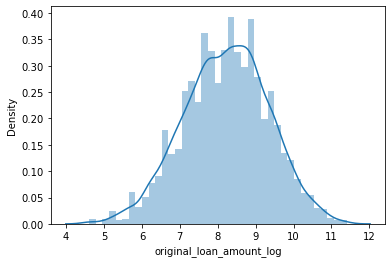

In [35]:
data['original_loan_amount_log'] = np.log(df['original_loan_amount'])
sns.distplot(data['original_loan_amount_log'])

C:\Users\Manyi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='remaining_loan_term', ylabel='Density'>

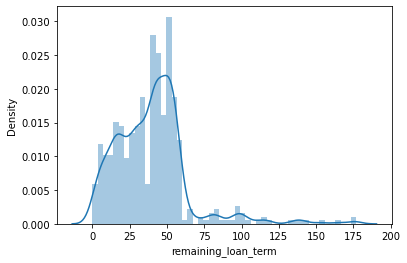

In [36]:
sns.distplot(data['remaining_loan_term'])

C:\Users\Manyi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delq_history', ylabel='count'>

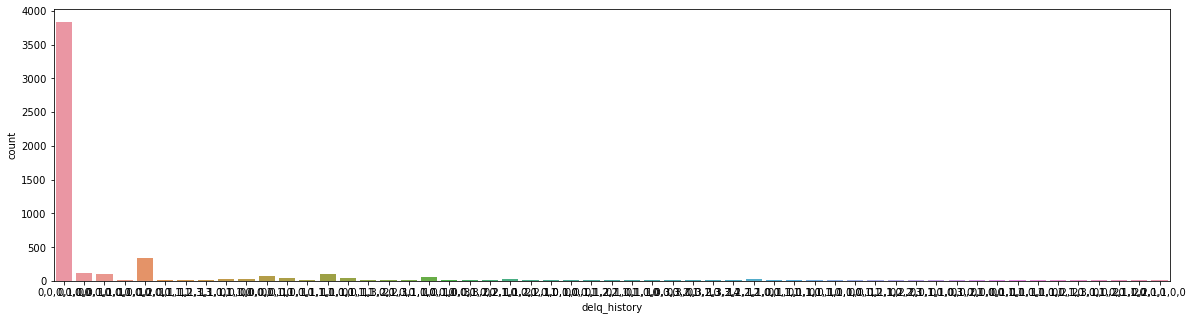

In [37]:
plt.figure(figsize=(20,5))
sns.countplot(data['delq_history'])

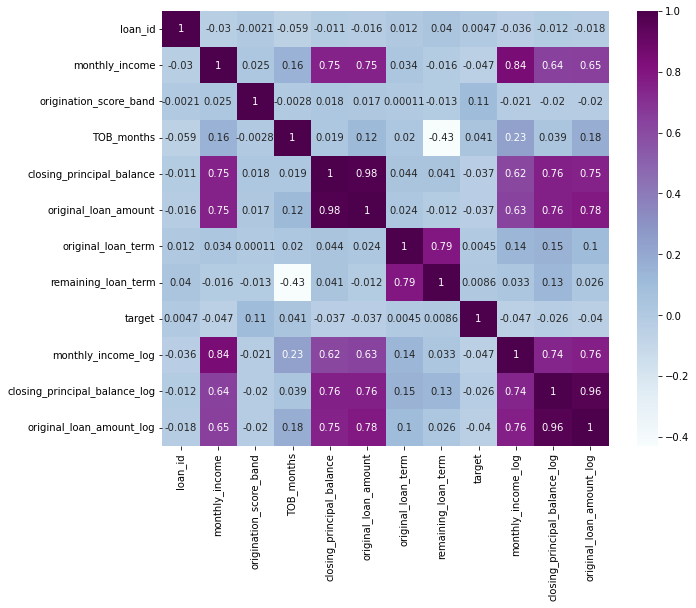

In [38]:
#Correlation Analysis
plt.figure(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr, annot = True, cmap="BuPu")
plt.savefig('caorrelation.jpg')

In [39]:
#Drop columns with low correlation

cols = ['loan_id', 'origination_score_band', 'TOB_months', 'closing_principal_balance', 'original_loan_amount', 'monthly_income', 'original_loan_term', 'remaining_loan_term']
dataset = data.drop(columns=cols, axis=1)
dataset

,product,delq_history,target,monthly_income_log,closing_principal_balance_log,original_loan_amount_log
0,B,"0,0,0,0,0,0",0,8.699515,5.703782,7.495542
1,B,"0,1,0,0,0,0",0,10.571317,8.881836,9.367344
2,B,"0,0,1,0,0,0",0,9.798127,7.901007,8.594154
3,B,"1,1,0,1,0,0",1,10.054060,8.268732,8.839277
4,B,"1,0,0,0,0,0",0,9.392662,7.649693,8.188689
...,...,...,...,...,...,...
5778,A,"0,0,0,0,0,0",0,9.017968,8.699515,8.699515
5779,C,"0,0,0,0,0,0",0,7.718685,7.313220,7.313220
5780,D,"0,0,0,0,0,0",0,8.229511,8.006368,8.006368
5781,D,"0,0,0,0,0,0",1,9.185023,8.922658,8.922658


In [40]:
dataset

,product,delq_history,target,monthly_income_log,closing_principal_balance_log,original_loan_amount_log
0,B,"0,0,0,0,0,0",0,8.699515,5.703782,7.495542
1,B,"0,1,0,0,0,0",0,10.571317,8.881836,9.367344
2,B,"0,0,1,0,0,0",0,9.798127,7.901007,8.594154
3,B,"1,1,0,1,0,0",1,10.054060,8.268732,8.839277
4,B,"1,0,0,0,0,0",0,9.392662,7.649693,8.188689
...,...,...,...,...,...,...
5778,A,"0,0,0,0,0,0",0,9.017968,8.699515,8.699515
5779,C,"0,0,0,0,0,0",0,7.718685,7.313220,7.313220
5780,D,"0,0,0,0,0,0",0,8.229511,8.006368,8.006368
5781,D,"0,0,0,0,0,0",1,9.185023,8.922658,8.922658


In [41]:
#Convert Categorical attributes to numerical attributes

from sklearn.preprocessing import LabelEncoder
cols = ["product","delq_history"]
le = LabelEncoder()
for col in cols:
    dataset[col] = le.fit_transform(data[col])

In [42]:
dataset

,product,delq_history,target,monthly_income_log,closing_principal_balance_log,original_loan_amount_log
0,1,0,0,8.699515,5.703782,7.495542
1,1,13,0,10.571317,8.881836,9.367344
2,1,6,0,9.798127,7.901007,8.594154
3,1,34,1,10.054060,8.268732,8.839277
4,1,26,0,9.392662,7.649693,8.188689
...,...,...,...,...,...,...
5778,0,0,0,9.017968,8.699515,8.699515
5779,2,0,0,7.718685,7.313220,7.313220
5780,3,0,0,8.229511,8.006368,8.006368
5781,3,0,1,9.185023,8.922658,8.922658


In [43]:
dataset.isnull().sum()

product                            0
delq_history                       0
target                             0
monthly_income_log               377
closing_principal_balance_log    377
original_loan_amount_log         377
dtype: int64

In [44]:
#Removing Null values from Log columns
dataset['monthly_income_log'] = dataset['monthly_income_log'].fillna(data['monthly_income_log'].mean())
dataset['closing_principal_balance_log'] = dataset['closing_principal_balance_log'].fillna(data['closing_principal_balance_log'].mean())
dataset['original_loan_amount_log'] = dataset['original_loan_amount_log'].fillna(data['original_loan_amount_log'].mean())

In [45]:
dataset.isnull().sum()

product                          0
delq_history                     0
target                           0
monthly_income_log               0
closing_principal_balance_log    0
original_loan_amount_log         0
dtype: int64

In [46]:
#Train-Test Split
##specifying input and output attributes

x = dataset.drop(columns=['target'], axis=1)
y = dataset['target']

In [47]:
#Split Data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [48]:
#Train Model

from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    #Cross validation is used for better validating the model
    #Eg. CV=5, train=4, test=1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross Validation is", np.mean(score)*100)
    

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, x, y)

Accuracy is 70.6016755521706
Cross Validation is 70.28571428571428


In [50]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, x, y)

Accuracy is 77.45620715917745
Cross Validation is 78.9904761904762


In [53]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, x, y)


Accuracy is 74.94287890327494
Cross Validation is 79.75238095238095


In [55]:
model = ExtraTreesClassifier()
classify(model, x, y)

Accuracy is 76.08530083777609
Cross Validation is 79.6952380952381


## Hyperparameter Tuning

In [61]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, x, y)

Accuracy is 71.82025894897181
Cross Validation is 72.89523809523808


## Confusion Matrix
The Summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. It gives insight, not only into the errors being made by classifier but more importantly the types of errors that are being made.

In [58]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [59]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[813, 110],
       [212, 178]], dtype=int64)

<AxesSubplot:>

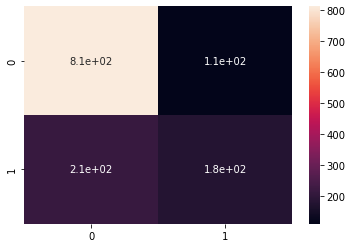

In [60]:
sns.heatmap(cm, annot=True)